UVES Sky Background data  
(http://www.eso.org/observing/dfo/quality/UVES/pipeline/sky_spectrum.html)

The tables within our redshift range are: gident_580U.dat, gident_860L.dat.

The gifs within our redshift range are: sky_5800U_4.gif, sky_8600L_1.gif, sky_8600L_2.gif

So we should probably check out: fluxed_sky_580U.fits, fluxed_sky860L.fits

In [1]:
# Pick the machine this code is running on so the home directory is set correctly:
chinook=False
coho = True

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# UVES Sky background files (continuum and emission lines)
filename1 = "fluxed_sky_580U.fits"
filename2 = "fluxed_sky_860L.fits"

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
hdulist1 = fits.open(filename1)
hdulist2 = fits.open(filename2)

In [3]:
#hdulist1.info()

In [4]:
#hdulist2.info()

In [5]:
#hdulist1[0].header

In [6]:
#hdulist2[0].header

In [7]:
flux1 = hdulist1[0].data
flux2 = hdulist2[0].data

In [8]:
CRPIX1 = hdulist1[0].header['CRPIX1']
CRVAL1 = hdulist1[0].header['CRVAL1']
CDELT1 = hdulist1[0].header['CDELT1']
print(CRPIX1,CRVAL1,CDELT1)
hdulist1.close()
begin = CRVAL1 - CRPIX1*CDELT1   
end = begin + len(flux1)*CDELT1
wavelength1 = np.arange(begin,end,CDELT1)
print(len(wavelength1),len(flux1))

(-945.0, 5817.06402, 0.03482)
(27284, 27284)


In [9]:
CRPIX1 = hdulist2[0].header['CRPIX1']
CRVAL1 = hdulist2[0].header['CRVAL1']
CDELT1 = hdulist2[0].header['CDELT1']
print(CRPIX1,CRVAL1,CDELT1)
hdulist2.close()
begin = CRVAL1 - CRPIX1*CDELT1   
end = begin + len(flux2)*CDELT1
wavelength2 = np.arange(begin,end,CDELT1)
print(len(wavelength2),len(flux2))

(-2318.0, 6605.74752, 0.04064)
(45278, 45277)


wavelength array is one element longer than the flux array.  Shortening the wavelength array.


(0, 1.5)

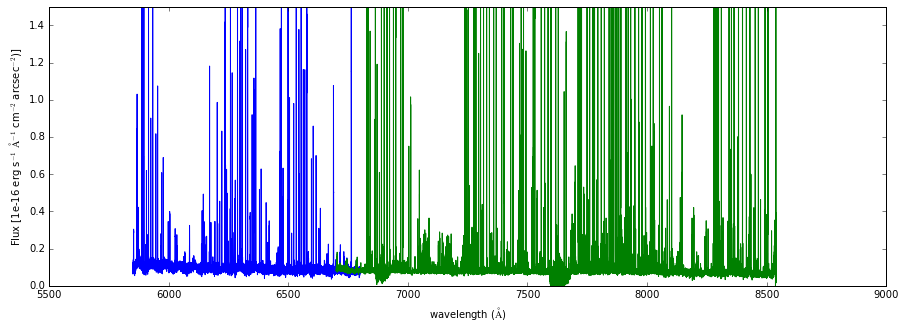

In [24]:
fig = plt.figure(figsize=(15.,5.))
for wavelength,flux in zip([wavelength1,wavelength2],[flux1,flux2]):
    if len(wavelength)==(len(flux)+1):
        print('wavelength array is one element longer than the flux array.  Shortening the wavelength array.')
        wavelength = wavelength[0:-1]
    plt.plot(wavelength,flux)
plt.ylabel(r'Flux [1e-16 erg s$^{-1}$ $\mathrm{\AA}^{-1}$ cm$^{-2}$ arcsec$^{-2}$)]')
plt.xlabel('wavelength ($\mathrm{\AA}$)')
plt.ylim(0,1.5)

Load the line lists from UVES.

In [12]:
line_wavelength = []

if chinook:
    homedir = 'Users/lokhorst'
elif coho:
    homedir = '/Users/deblokhorst'

with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_580U.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            line_wavelength.append(tmp[1])
with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_860L.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            line_wavelength.append(tmp[1])

###The following file is identical to the UVES sky background, probably obviously
#with open('/Users/lokhorst/Dropbox/UVES Sky Background/UVES_sky_all/UVES_skyatlas_table7.dat','r') as f:
#    for line in f:
#        if line[0]!='#' and len(line)>5:
#            tmp = line.split()
#            line_wavelength.append(tmp[1])
line_wavelength = np.array(line_wavelength,'d')

line_wavelength_KECK = []
with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/KECK_HIRES_skyatlas_OH.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            line_wavelength_KECK.append(tmp[0])
line_wavelength_KECK = np.array(line_wavelength_KECK,'d')

Load the sample spiral galaxy spectrum (from Gemini ITC, http://www.gemini.edu/sciops/instruments/integration-time-calculators/gmosn-itc).  
From the Gemini website: "Spiral (Sc) galaxy - a template spectrum (type Sc, class T=5) covering the wavelength range 22 - 10000 nm and taken from the Pegase Atlas of Galaxies by Fioc & Rocca-Volmerange (1997). The spectrum has a sampling of 1nm at wavelengths shortwards of 878nm and 20nm longwards. (Look at a plot or download the data file)."

-->  Not high enough resolution!! But it looks like there are only like three lines in this plot anyway.

(0, 2)

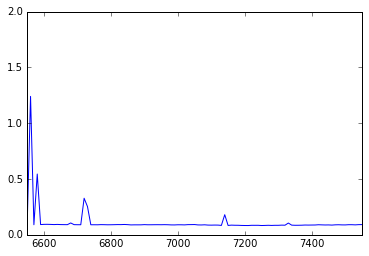

In [13]:
gal_wavelength = []
gal_flux = []
with open('GeminiITC_spiralgalaxy.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            gal_wavelength.append(tmp[0])
            gal_flux.append(tmp[1])
            
gal_wavelength = np.array(gal_wavelength,'d')*10. # wavelength now in Angstroms
gal_flux = np.array(gal_flux,'d')

plt.plot(gal_wavelength,gal_flux/10.)
plt.xlim(6550,7550)
plt.ylim(0,2)

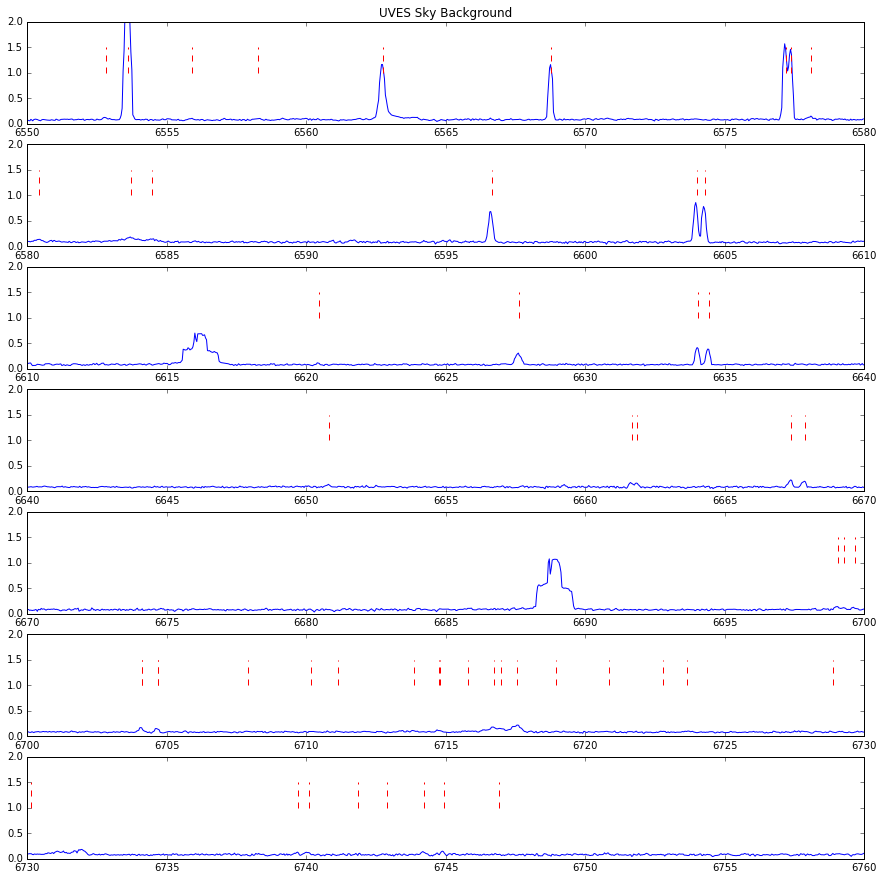

In [13]:
#f = plt.figure(figsize=(15.,10.))
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, sharey=True, figsize=(15.,15.))
ax1.set_title('UVES Sky Background')

for lowlim,ax in zip([6550.,6580.,6610.,6640.,6670.,6700.,6730.],[ax1,ax2,ax3,ax4,ax5,ax6,ax7]):
    ax.plot(wavelength1[(wavelength1>lowlim) & (wavelength1<(lowlim+30.))],flux1[(wavelength1>lowlim) & (wavelength1<(lowlim+30.))])
    ax.set_ylim(0,2)
    ax.set_xlim(lowlim,(lowlim+30.))
    for line in line_wavelength:
        ax.plot([line,line],[1.0,1.5],'r--')
    #for line in line_wavelength_KECK:
    #    ax.plot([line,line],[1.5,2.],'g--')
    
#plt.savefig('UVES_KECK_skybackground.pdf')

    

plt.savefig('UVES_KECK_skybackground_ScGalaxy.pdf')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 45277 but corresponding boolean dimension is 45278


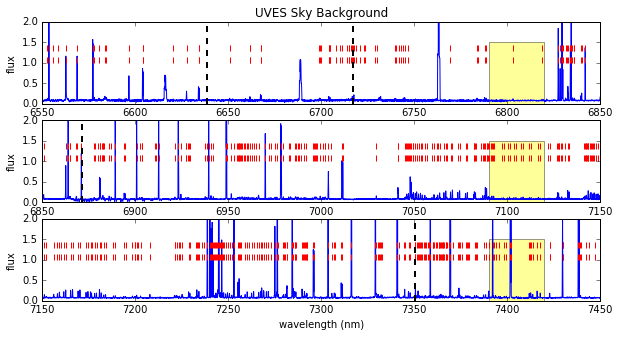

In [21]:
z_50 = 0.0115
z_100 = 0.0235
z_200 = 0.047
z_500 = 0.12
lambda_50 = 6563.*(z_50+1.)
lambda_100 = 6563.*(z_100+1.)
lambda_200 = 6563.*(z_200+1.)
lambda_500 = 6563.*(z_500+1.)

#f = plt.figure(figsize=(15.,10.))
f, (ax1, ax2,ax3) = plt.subplots(3, sharey=True, figsize=(10.,5.))
ax1.set_title('UVES Sky Background')

for lowlim,ax in zip([6550.,6850.,7150.],[ax1,ax2,ax3]):
    ax.plot(wavelength1[(wavelength1>lowlim) & (wavelength1<(lowlim+300.))],flux1[(wavelength1>lowlim) & (wavelength1<(lowlim+300.))],'b')
    ax.plot(wavelength2[(wavelength2>lowlim) & (wavelength2<(lowlim+300.))],flux2[(wavelength2>lowlim) & (wavelength2<(lowlim+300.))],'b')
    ax.set_ylim(0,2)
    ax.set_xlim(lowlim,(lowlim+300.))
    ax.set_ylabel('flux')
    for line in line_wavelength:
        ax.plot([line,line],[1.0,1.5],'r--')
        
    for wavelen,name in zip([lambda_50,lambda_100,lambda_200,lambda_500],['50 Mpc','100 Mpc','200 Mpc','500 Mpc']):
        ax.plot([wavelen,wavelen],[0.,3.],'k--',linewidth=2)
       # if (wavelen>lowlim) and (wavelen<(lowlim+300.)):
       #     plt.text(line,1.5,name,rotation=90)
        
    ax.fill_between([lowlim+240.,lowlim+240.+30.], 0, 1.5,facecolor ='yellow',alpha=0.4)
    #ax.plot([lowlim+240.,lowlim+240.,lowlim+240.+30.,lowlim+240.+30.,lowlim+240.],[0,1.5,1.5,0,0],'g-',linewidth=2)

ax.set_xlabel('wavelength (nm)')
plt.savefig('UVES_skybackground_condensed.pdf')

In [19]:
z_50 = 0.0115
z_100 = 0.0235
z_200 = 0.047
z_500 = 0.12
lambda_50 = 6563.*(z_50+1.)
lambda_100 = 6563.*(z_100+1.)
lambda_200 = 6563.*(z_200+1.)
lambda_500 = 6563.*(z_500+1.)
print(lambda_50,lambda_100,lambda_200,lambda_500)

(6638.4745, 6717.230500000001, 6871.460999999999, 7350.56)


In [63]:
6550.+600.

7150.0